# Comparative Analysis of Supervised MLA on a Fraud Detection Problem
                            (Torture the data, and it will confess to anything)

### Description (Eng & Fr) :
#### Using State of the Art ML Algorithms, we're building predictive models to detect fraud by learning from historical data.
#### À l'aide des algorithmes d'apprentissage automatique de l'etat d'art , nous construisons des modèles prédictifs pour détecter la fraude en apprenant des données historiques.
#### SoA algorithms used :
    Bagging with DecisionTrees
    Ensemble Boosting : AdaBoost
    Ensemble : RandomForest
    kNN ( k-nearest neighbours)
    Naive Bayes
    Logistic Regression
    Support Vector Machine
    Ensemble Learning : Voting(knn,LR,NaiveB)

In [1]:
import numpy as np
import sklearn as sk
import pandas as pd

In [2]:
##metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [3]:
## data Loading
df = pd.read_csv('C:/Users/VonGola/Downloads/Compressed/creditcard.csv', low_memory=False)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
##bagging
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
###Voting
from sklearn.ensemble import VotingClassifier
### Boosting
from sklearn.ensemble import AdaBoostClassifier
## LR
from sklearn.linear_model import LogisticRegression
## kNN
from sklearn.neighbors import KNeighborsClassifier
## SVM
from sklearn.svm import SVC
######

from time import time
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

Data is extremely unbalanced


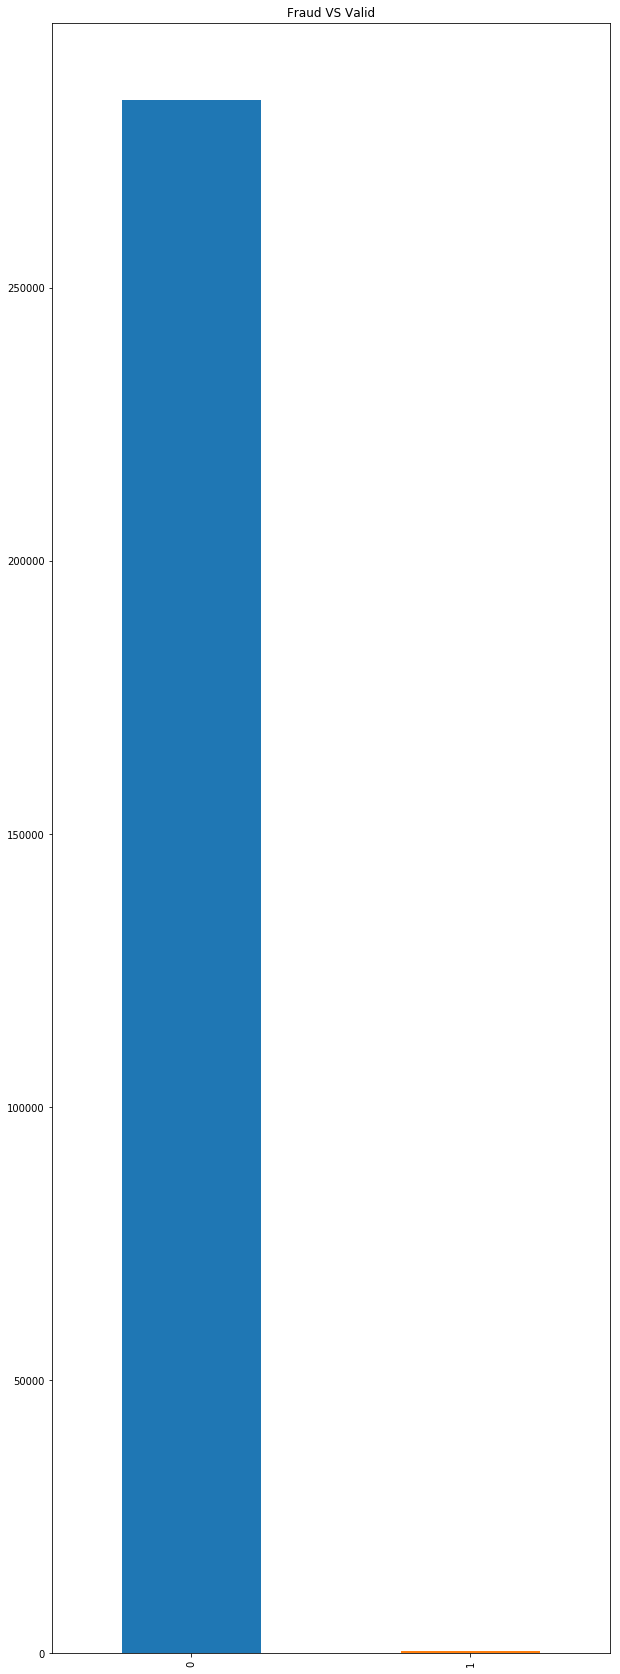

In [5]:
columns=df.columns
features_columns=columns.delete(len(columns)-1)
features=df[features_columns]
labels=df['Class']
plt.figure(figsize=(10,30))
count_classes = pd.value_counts(df['Class'], sort = True).sort_index()
count_classes.plot(kind = 'bar')
plt.title('Fraud VS Valid')
print("Data is extremely unbalanced")

c:\users\vongola\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.
c:\users\vongola\appdata\local\programs\python\python35\lib\site-packages\matplotlib\axes\_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


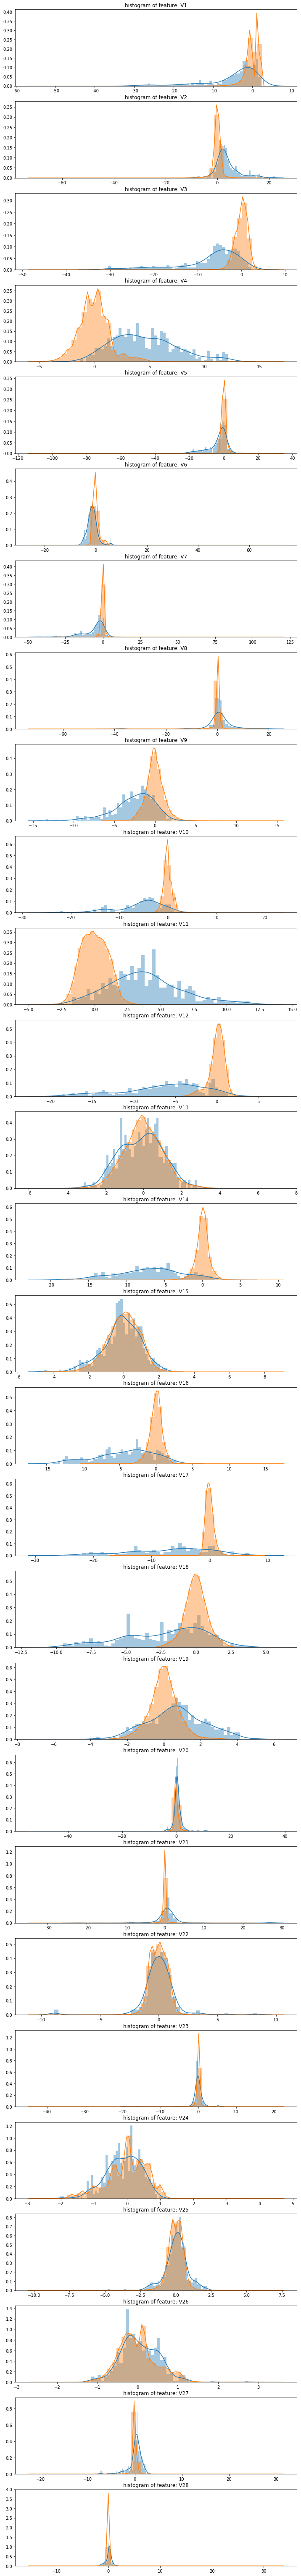

In [6]:
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import seaborn as sns
_features = df.ix[:,1:29].columns
plt.figure(figsize=(12,28*4))
gs = gridspec.GridSpec(28, 1)
for i, cn in enumerate(df[_features]):
    ax = plt.subplot(gs[i])
    sns.distplot(df[cn][df.Class == 1], bins=50)
    sns.distplot(df[cn][df.Class == 0], bins=50)
    ax.set_xlabel('')
    ax.set_title('histogram of feature: ' + str(cn))
plt.show()

In [6]:
df = df.drop(['V28','V27','V26','V25','V24','V23','V22','V20','V15','V13','V8'], axis =1)

In [7]:
## Testing dataframe
train, validate, test = np.split(df.sample(frac=1), [int(.6*len(df)), int(.8*len(df))])
print(len(train))
print(len(validate))
print(len(test))

170884
56961
56962


In [8]:
train.describe()
print(train.groupby('Class').size())

Class
0    170595
1       289
dtype: int64


In [9]:
test.describe()
print(test.groupby('Class').size())

Class
0    56870
1       92
dtype: int64


In [10]:
validate.describe()
print(validate.groupby('Class').size())

Class
0    56850
1      111
dtype: int64


In [51]:
X = test.iloc[:,:-1]
y= test['Class']
X2 = train.iloc[:,:-1]
y2 = train['Class']
Xv=validate.iloc[:,:-1]
yv=validate['Class']

## **Bagging with DecisionTrees**

In [13]:
### Bagging Dtrees
seed = 7
kfold = model_selection.KFold(n_splits=10, random_state=seed)
cart = DecisionTreeClassifier()
num_trees = 100
model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=seed)
#results = model_selection.cross_val_score(model, X2, y2, cv=kfold)

In [14]:
model.fit(X2,y2)


BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=100, n_jobs=1, oob_score=False,
         random_state=7, verbose=0, warm_start=False)

In [15]:
predictions = model.predict(X)
pred_fraud = np.where(predictions == 1)[0]
real_fraud = np.where(y == 1)[0]
false_pos = len(np.setdiff1d(pred_fraud, real_fraud))


pred_good = np.where(predictions == 0)[0]
real_good = np.where(y == 0)[0]
false_neg = len(np.setdiff1d(pred_good, real_good))
FP=false_pos
FN=false_neg
TP=len(real_fraud)-FN
TN=len(real_good)-FP
false_neg_rate = false_neg/(false_pos+false_neg)

accuracy = (len(X2) - (false_neg + false_pos)) / len(X2)
print("Accuracy:", accuracy)

print("Total test data points:", len(X2))
import math

print("TP ",TP)
print("FP ",FP)
print("TN ",TN)
print("FN ",FN)
recall=TP/float(TP+FN)
ee=TP/float(TP+FN)
tmp=TN/float(TN+FP)
MCC=ee+tmp
MCC=MCC/2
print("BCR : BALANCED CLASSIFICATION RATE ",MCC)
print("total fraud ",TP+FN)
print("total legit ",TN+FP)
print("Recall; percentage of detected fraud ",recall)
far=FP/float(TN+FP)
print("false alarm rate ",far)

Accuracy: 0.9998244423117436
Total test data points: 170884
TP  77
FP  6
TN  56855
FN  24
BCR : BALANCED CLASSIFICATION RATE  0.881135358571998
total fraud  101
total legit  56861
Recall; percentage of detected fraud  0.7623762376237624
false alarm rate  0.00010552047976644801


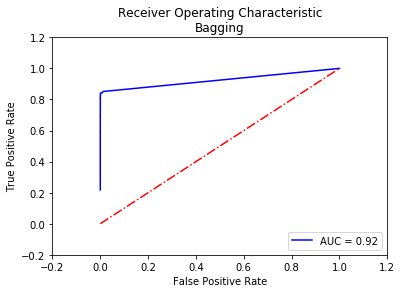

In [16]:
## ROC curve
y_rf=model.predict(X)
y_rf_prob=model.predict_proba(X)[:,1]

auc=metrics.roc_auc_score(y,y_rf_prob)

#plotting the ROC curve
fpr,tpr,thresholds=metrics.roc_curve(y,y_rf_prob)
plt.plot(fpr,tpr,'b', label='AUC = %0.2f'% auc)
plt.plot([0,1],[0,1],'r-.')
plt.xlim([-0.2,1.2])
plt.ylim([-0.2,1.2])
plt.title('Receiver Operating Characteristic\nBagging')
plt.legend(loc='lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [17]:
print(accuracy_score(y, predictions))
print(" ")
print("Matrice de confusion : ")
print(" ")
print(confusion_matrix(y, predictions))
print("Rapport de classification pour l'algorithme svm : ")
print(" ")
print(classification_report(y, predictions))

0.9994733330992591
 
Matrice de confusion : 
 
[[56855     6]
 [   24    77]]
Rapport de classification pour l'algorithme svm : 
 
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     56861
          1       0.93      0.76      0.84       101

avg / total       1.00      1.00      1.00     56962



## **Ensemble Boosting**

In [19]:
## AdaBoosting
seed = 7
kfold = model_selection.KFold(n_splits=10, random_state=seed)
num_trees = 150
model = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
#results = model_selection.cross_val_score(model, X2, y2, cv=kfold)

Accuracy: 0.9998185903888017
Total test data points: 170884
TP  76
FP  6
TN  56855
FN  25
BCR : BALANCED CLASSIFICATION RATE  0.876184863522493
total fraud  101
total legit  56861
Recall; percentage of detected fraud  0.7524752475247525
false alarm rate  0.00010552047976644801


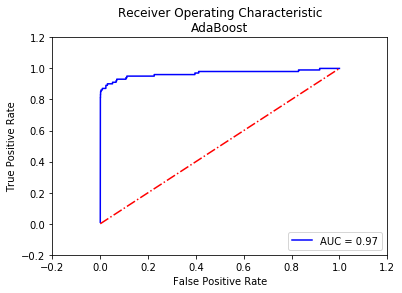

In [20]:
model.fit(X2,y2)
predictions = model.predict(X)
pred_fraud = np.where(predictions == 1)[0]
real_fraud = np.where(y == 1)[0]
false_pos = len(np.setdiff1d(pred_fraud, real_fraud))


pred_good = np.where(predictions == 0)[0]
real_good = np.where(y == 0)[0]
false_neg = len(np.setdiff1d(pred_good, real_good))
FP=false_pos
FN=false_neg
TP=len(real_fraud)-FN
TN=len(real_good)-FP
false_neg_rate = false_neg/(false_pos+false_neg)

accuracy = (len(X2) - (false_neg + false_pos)) / len(X2)
print("Accuracy:", accuracy)

print("Total test data points:", len(X2))
import math

print("TP ",TP)
print("FP ",FP)
print("TN ",TN)
print("FN ",FN)
recall=TP/float(TP+FN)
ee=TP/float(TP+FN)
tmp=TN/float(TN+FP)
MCC=ee+tmp
MCC=MCC/2
print("BCR : BALANCED CLASSIFICATION RATE ",MCC)
print("total fraud ",TP+FN)
print("total legit ",TN+FP)
print("Recall; percentage of detected fraud ",recall)
far=FP/float(TN+FP)
print("false alarm rate ",far)

y_rf=model.predict(X)
y_rf_prob=model.predict_proba(X)[:,1]

auc=metrics.roc_auc_score(y,y_rf_prob)

#plotting the ROC curve
fpr,tpr,thresholds=metrics.roc_curve(y,y_rf_prob)
plt.plot(fpr,tpr,'b', label='AUC = %0.2f'% auc)
plt.plot([0,1],[0,1],'r-.')
plt.xlim([-0.2,1.2])
plt.ylim([-0.2,1.2])
plt.title('Receiver Operating Characteristic\nAdaBoost')
plt.legend(loc='lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [21]:
print(accuracy_score(y, predictions))
print(" ")
print("Matrice de confusion : ")
print(" ")
print(confusion_matrix(y, predictions))
print("Rapport de classification pour l'algorithme svm : ")
print(" ")
print(classification_report(y, predictions))

0.9994557775359011
 
Matrice de confusion : 
 
[[56855     6]
 [   25    76]]
Rapport de classification pour l'algorithme svm : 
 
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     56861
          1       0.93      0.75      0.83       101

avg / total       1.00      1.00      1.00     56962



## **Ensemble : RandomForest**

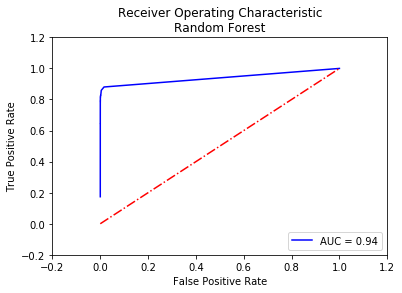

Accuracy: 0.9998419980805693
Total test data points: 170884
TP  72
FP  7
TN  56863
FN  20
BCR : BALANCED CLASSIFICATION RATE  0.8912428039540983
total fraud  92
total legit  56870
Recall; percentage of detected fraud  0.782608695652174
false alarm rate  0.00012308774397749254


In [14]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(criterion='gini',random_state=7,n_estimators=60)
rf.fit(X2,y2)
y_rf=rf.predict(X)
y_rf_prob=rf.predict_proba(X)[:,1]

#Performance metrics evaluation
auc=metrics.roc_auc_score(y,y_rf_prob)

#plotting the ROC curve
fpr,tpr,thresholds=metrics.roc_curve(y,y_rf_prob)
plt.plot(fpr,tpr,'b', label='AUC = %0.2f'% auc)
plt.plot([0,1],[0,1],'r-.')
plt.xlim([-0.2,1.2])
plt.ylim([-0.2,1.2])
plt.title('Receiver Operating Characteristic\nRandom Forest')
plt.legend(loc='lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
predictions=y_rf
pred_fraud = np.where(predictions == 1)[0]
real_fraud = np.where(y == 1)[0]
false_pos = len(np.setdiff1d(pred_fraud, real_fraud))


pred_good = np.where(predictions == 0)[0]
real_good = np.where(y == 0)[0]
false_neg = len(np.setdiff1d(pred_good, real_good))
FP=false_pos
FN=false_neg
TP=len(real_fraud)-FN
TN=len(real_good)-FP
false_neg_rate = false_neg/(false_pos+false_neg)

accuracy = (len(X2) - (false_neg + false_pos)) / len(X2)
print("Accuracy:", accuracy)

print("Total test data points:", len(X2))


print("TP ",TP)
print("FP ",FP)
print("TN ",TN)
print("FN ",FN)
recall=TP/float(TP+FN)
ee=TP/float(TP+FN)
tmp=TN/float(TN+FP)
MCC=ee+tmp
MCC=MCC/2
print("BCR : BALANCED CLASSIFICATION RATE ",MCC)
print("total fraud ",TP+FN)
print("total legit ",TN+FP)
print("Recall; percentage of detected fraud ",recall)
far=FP/float(TN+FP)
print("false alarm rate ",far)

## kNN ( k-nearest neighbours)

Accuracy: 0.9984375548611355
Total test data points: 56962
TP  12
FP  0
TN  56861
FN  89
BCR : BALANCED CLASSIFICATION RATE  0.5594059405940595
total fraud  101
total legit  56861
Recall; percentage of detected fraud  0.1188118811881188
false alarm rate  0.0


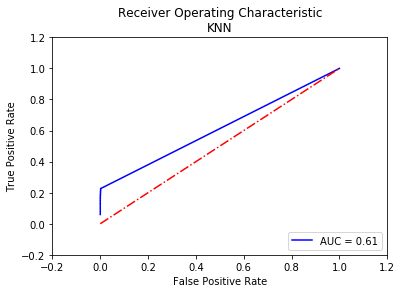

In [23]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.neighbors import NearestNeighbors
model=KNeighborsClassifier(n_neighbors = 5,algorithm='kd_tree',weights='distance')

model.fit(X2,y2)

predictions = model.predict(X)
pred_fraud = np.where(predictions == 1)[0]
real_fraud = np.where(y == 1)[0]
false_pos = len(np.setdiff1d(pred_fraud, real_fraud))

pred_good = np.where(predictions == 0)[0]
real_good = np.where(y == 0)[0]
false_neg = len(np.setdiff1d(pred_good, real_good))
FP=false_pos
FN=false_neg
TP=len(real_fraud)-FN
TN=len(real_good)-FP
false_neg_rate = false_neg/(false_pos+false_neg)

accuracy = (len(X) - (false_neg + false_pos)) / len(X)
print("Accuracy:", accuracy)

print("Total test data points:", len(X))
import math

print("TP ",TP)
print("FP ",FP)
print("TN ",TN)
print("FN ",FN)
recall=TP/float(TP+FN)
ee=TP/float(TP+FN)
tmp=TN/float(TN+FP)
MCC=ee+tmp
MCC=MCC/2
print("BCR : BALANCED CLASSIFICATION RATE ",MCC)
print("total fraud ",TP+FN)
print("total legit ",TN+FP)
print("Recall; percentage of detected fraud ",recall)
far=FP/float(TN+FP)
print("false alarm rate ",far)

y_rf=model.predict(X)
y_rf_prob=model.predict_proba(X)[:,1]

auc=metrics.roc_auc_score(y,y_rf_prob)

#plotting the ROC curve
fpr,tpr,thresholds=metrics.roc_curve(y,y_rf_prob)
plt.plot(fpr,tpr,'b', label='AUC = %0.2f'% auc)
plt.plot([0,1],[0,1],'r-.')
plt.xlim([-0.2,1.2])
plt.ylim([-0.2,1.2])
plt.title('Receiver Operating Characteristic\nKNN')
plt.legend(loc='lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Naive Bayes 

Accuracy: 0.994399775288789
Total test data points: 56962
TP  63
FP  281
TN  56580
FN  38
BCR : BALANCED CLASSIFICATION RATE  0.8094102502176141
total fraud  101
total legit  56861
Recall; percentage of detected fraud  0.6237623762376238
false alarm rate  0.004941875802395315


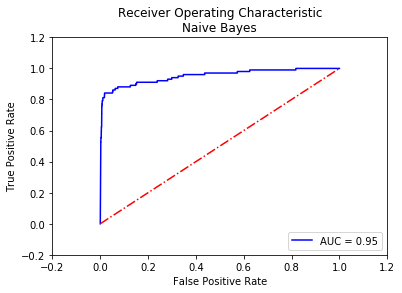

In [24]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()

model.fit(X2,y2)

predictions = model.predict(X)
pred_fraud = np.where(predictions == 1)[0]
real_fraud = np.where(y == 1)[0]
false_pos = len(np.setdiff1d(pred_fraud, real_fraud))


pred_good = np.where(predictions == 0)[0]
real_good = np.where(y == 0)[0]
false_neg = len(np.setdiff1d(pred_good, real_good))
FP=false_pos
FN=false_neg
TP=len(real_fraud)-FN
TN=len(real_good)-FP
false_neg_rate = false_neg/(false_pos+false_neg)

accuracy = (len(X) - (false_neg + false_pos)) / len(X)
print("Accuracy:", accuracy)

print("Total test data points:", len(X))
import math

print("TP ",TP)
print("FP ",FP)
print("TN ",TN)
print("FN ",FN)
recall=TP/float(TP+FN)
ee=TP/float(TP+FN)
tmp=TN/float(TN+FP)
MCC=ee+tmp
MCC=MCC/2
print("BCR : BALANCED CLASSIFICATION RATE ",MCC)
print("total fraud ",TP+FN)
print("total legit ",TN+FP)
print("Recall; percentage of detected fraud ",recall)
far=FP/float(TN+FP)
print("false alarm rate ",far)

y_rf=model.predict(X)
y_rf_prob=model.predict_proba(X)[:,1]

auc=metrics.roc_auc_score(y,y_rf_prob)

#plotting the ROC curve
fpr,tpr,thresholds=metrics.roc_curve(y,y_rf_prob)
plt.plot(fpr,tpr,'b', label='AUC = %0.2f'% auc)
plt.plot([0,1],[0,1],'r-.')
plt.xlim([-0.2,1.2])
plt.ylim([-0.2,1.2])
plt.title('Receiver Operating Characteristic\nNaive Bayes')
plt.legend(loc='lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Accuracy: 0.9939783360544934
Total test data points: 56961
TP  62
FP  317
TN  56556
FN  26
BCR : BALANCED CLASSIFICATION RATE  0.8494858160846416
total fraud  88
total legit  56873
Recall; percentage of detected fraud  0.7045454545454546
false alarm rate  0.00557382237617147


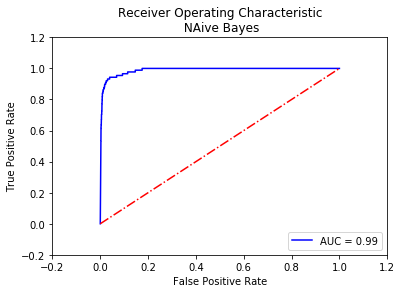

In [25]:
## retrain with test results

model.partial_fit(X,y)
predictions = model.predict(Xv)
pred_fraud = np.where(predictions == 1)[0]
real_fraud = np.where(yv == 1)[0]
false_pos = len(np.setdiff1d(pred_fraud, real_fraud))


pred_good = np.where(predictions == 0)[0]
real_good = np.where(yv == 0)[0]
false_neg = len(np.setdiff1d(pred_good, real_good))
FP=false_pos
FN=false_neg
TP=len(real_fraud)-FN
TN=len(real_good)-FP
false_neg_rate = false_neg/(false_pos+false_neg)

accuracy = (len(Xv) - (false_neg + false_pos)) / len(Xv)
print("Accuracy:", accuracy)

print("Total test data points:", len(Xv))
import math

print("TP ",TP)
print("FP ",FP)
print("TN ",TN)
print("FN ",FN)
recall=TP/float(TP+FN)
ee=TP/float(TP+FN)
tmp=TN/float(TN+FP)
MCC=ee+tmp
MCC=MCC/2
print("BCR : BALANCED CLASSIFICATION RATE ",MCC)
print("total fraud ",TP+FN)
print("total legit ",TN+FP)
print("Recall; percentage of detected fraud ",recall)
far=FP/float(TN+FP)
print("false alarm rate ",far)

y_rf=model.predict(Xv)
y_rf_prob=model.predict_proba(Xv)[:,1]

auc=metrics.roc_auc_score(yv,y_rf_prob)

#plotting the ROC curve
fpr,tpr,thresholds=metrics.roc_curve(yv,y_rf_prob)
plt.plot(fpr,tpr,'b', label='AUC = %0.2f'% auc)
plt.plot([0,1],[0,1],'r-.')
plt.xlim([-0.2,1.2])
plt.ylim([-0.2,1.2])
plt.title('Receiver Operating Characteristic\n NAive Bayes')
plt.legend(loc='lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Logistic Regression

Accuracy: 0.9988237772550121
Total test data points: 56962
TP  40
FP  15
TN  56855
FN  52
BCR : BALANCED CLASSIFICATION RATE  0.7172594246221359
total fraud  92
total legit  56870
Recall; percentage of detected fraud  0.43478260869565216
false alarm rate  0.0002637594513803411


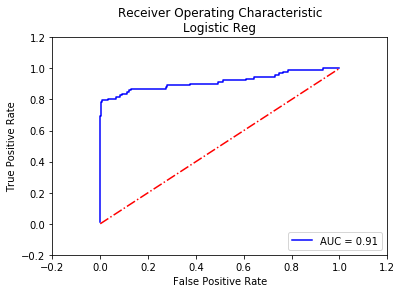

In [13]:
from sklearn.linear_model import LogisticRegression

model=LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None,max_iter=500, multi_class='ovr', verbose=0, warm_start=False, n_jobs=1)

model.fit(X2,y2)

predictions = model.predict(X)
pred_fraud = np.where(predictions == 1)[0]
real_fraud = np.where(y == 1)[0]
false_pos = len(np.setdiff1d(pred_fraud, real_fraud))


pred_good = np.where(predictions == 0)[0]
real_good = np.where(y == 0)[0]
false_neg = len(np.setdiff1d(pred_good, real_good))
FP=false_pos
FN=false_neg
TP=len(real_fraud)-FN
TN=len(real_good)-FP
false_neg_rate = false_neg/(false_pos+false_neg)

accuracy = (len(X) - (false_neg + false_pos)) / len(X)
print("Accuracy:", accuracy)

print("Total test data points:", len(X))
import math

print("TP ",TP)
print("FP ",FP)
print("TN ",TN)
print("FN ",FN)
recall=TP/float(TP+FN)
ee=TP/float(TP+FN)
tmp=TN/float(TN+FP)
MCC=ee+tmp
MCC=MCC/2
print("BCR : BALANCED CLASSIFICATION RATE ",MCC)
print("total fraud ",TP+FN)
print("total legit ",TN+FP)
print("Recall; percentage of detected fraud ",recall)
far=FP/float(TN+FP)
print("false alarm rate ",far)

y_rf=model.predict(X)
y_rf_prob=model.predict_proba(X)[:,1]

auc=metrics.roc_auc_score(y,y_rf_prob)

#plotting the ROC curve
fpr,tpr,thresholds=metrics.roc_curve(y,y_rf_prob)
plt.plot(fpr,tpr,'b', label='AUC = %0.2f'% auc)
plt.plot([0,1],[0,1],'r-.')
plt.xlim([-0.2,1.2])
plt.ylim([-0.2,1.2])
plt.title('Receiver Operating Characteristic\nLogistic Reg')
plt.legend(loc='lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Support Vector Machine

In [ ]:
from sklearn.svm import SVC

model=SVC(probability=True,degree=5)

from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

model.fit(X_reduced,y2)



In [ ]:
X_scaled = scale(X)
pca = PCA(n_components=2)
X = pca.fit_transform(X_scaled)

predictions = model.predict(X)
pred_fraud = np.where(predictions == 1)[0]
real_fraud = np.where(y == 1)[0]
false_pos = len(np.setdiff1d(pred_fraud, real_fraud))


pred_good = np.where(predictions == 0)[0]
real_good = np.where(y == 0)[0]
false_neg = len(np.setdiff1d(pred_good, real_good))
FP=false_pos
FN=false_neg
TP=len(real_fraud)-FN
TN=len(real_good)-FP
false_neg_rate = false_neg/(false_pos+false_neg)

accuracy = (len(X) - (false_neg + false_pos)) / len(X)
print("Accuracy:", accuracy)

print("Total test data points:", len(X))
import math

print("TP ",TP)
print("FP ",FP)
print("TN ",TN)
print("FN ",FN)
recall=TP/float(TP+FN)
ee=TP/float(TP+FN)
tmp=TN/float(TN+FP)
MCC=ee+tmp
MCC=MCC/2
print("BCR : BALANCED CLASSIFICATION RATE ",MCC)
print("total fraud ",TP+FN)
print("total legit ",TN+FP)
print("Recall; percentage of detected fraud ",recall)
far=FP/float(TN+FP)
print("false alarm rate ",far)

y_rf=model.predict(X)
y_rf_prob=model.predict_proba(X)[:,1]

auc=metrics.roc_auc_score(y,y_rf_prob)

#plotting the ROC curve
fpr,tpr,thresholds=metrics.roc_curve(y,y_rf_prob)
plt.plot(fpr,tpr,'b', label='AUC = %0.2f'% auc)
plt.plot([0,1],[0,1],'r-.')
plt.xlim([-0.2,1.2])
plt.ylim([-0.2,1.2])
plt.title('Receiver Operating Characteristic\nSupport Vector Machine')
plt.legend(loc='lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Ensemble Learning ; Voting (knn,LR,NaiveB)

In [36]:
from sklearn.ensemble import VotingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
seed = 7
kfold = model_selection.KFold(n_splits=10, random_state=seed)
# create the sub models
estimators = []
#model1 = LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None,max_iter=500, multi_class='ovr', verbose=0, warm_start=False, n_jobs=1)
#estimators.append(('logistic', model1))
model2 = DecisionTreeClassifier()
estimators.append(('cart', model2))
model3=RandomForestClassifier(criterion='gini',random_state=7,n_estimators=60)
estimators.append(('RF', model3))
model4=GaussianNB()
estimators.append(('NB', model4))
model5=AdaBoostClassifier(n_estimators=60, random_state=seed)
# create the ensemble model
model = VotingClassifier(estimators,voting='soft')



In [37]:

model.fit(X2,y2)


VotingClassifier(estimators=[('cart', DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_le...    oob_score=False, random_state=7, verbose=0, warm_start=False)), ('NB', GaussianNB(priors=None))],
         flatten_transform=None, n_jobs=1, voting='soft', weights=None)

c:\users\vongola\appdata\local\programs\python\python35\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Accuracy: 0.9995435553526912
Total test data points: 56962
TP  77
FP  2
TN  56859
FN  24
BCR : BALANCED CLASSIFICATION RATE  0.8811705320652534
total fraud  101
total legit  56861
Recall; percentage of detected fraud  0.7623762376237624
false alarm rate  3.5173493255482666e-05


c:\users\vongola\appdata\local\programs\python\python35\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


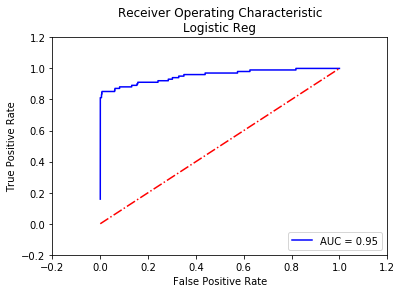

In [41]:

predictions = model.predict(X)
pred_fraud = np.where(predictions == 1)[0]
real_fraud = np.where(y == 1)[0]
false_pos = len(np.setdiff1d(pred_fraud, real_fraud))


pred_good = np.where(predictions == 0)[0]
real_good = np.where(y == 0)[0]
false_neg = len(np.setdiff1d(pred_good, real_good))
FP=false_pos
FN=false_neg
TP=len(real_fraud)-FN
TN=len(real_good)-FP
false_neg_rate = false_neg/(false_pos+false_neg)

accuracy = (len(X) - (false_neg + false_pos)) / len(X)
print("Accuracy:", accuracy)

print("Total test data points:", len(X))
import math

print("TP ",TP)
print("FP ",FP)
print("TN ",TN)
print("FN ",FN)
recall=TP/float(TP+FN)
ee=TP/float(TP+FN)
tmp=TN/float(TN+FP)
MCC=ee+tmp
MCC=MCC/2
print("BCR : BALANCED CLASSIFICATION RATE ",MCC)
print("total fraud ",TP+FN)
print("total legit ",TN+FP)
print("Recall; percentage of detected fraud ",recall)
far=FP/float(TN+FP)
print("false alarm rate ",far)

y_rf=model.predict(X)
y_rf_prob=model.predict_proba(X)[:,1]

auc=metrics.roc_auc_score(y,y_rf_prob)

#plotting the ROC curve
fpr,tpr,thresholds=metrics.roc_curve(y,y_rf_prob)
plt.plot(fpr,tpr,'b', label='AUC = %0.2f'% auc)
plt.plot([0,1],[0,1],'r-.')
plt.xlim([-0.2,1.2])
plt.ylim([-0.2,1.2])
plt.title('Receiver Operating Characteristic\nLogistic Reg')
plt.legend(loc='lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Results & Conclusion

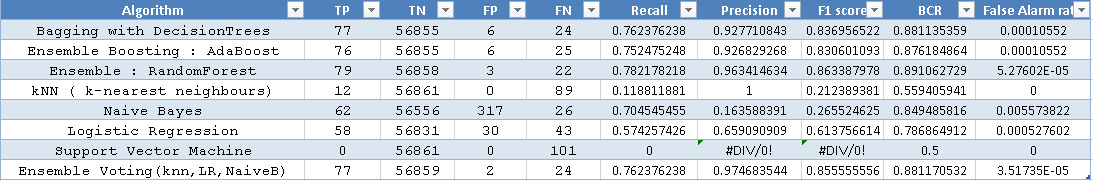

In [44]:
from IPython.display import Image
Image(filename='C:/Users/VonGola/Desktop/Capture.PNG')
## tableau récapitulatif || summary table


Legend :

    FP= False Positive, FN=False Negative , TP= True Positive,FN=False Negative,  BCR= Balanced Classification rate

**Testing set**

    Total Fraud = 101 
    Total valid transactions =56861
    

## Results Analysis
**Among the state of the art algos used in this project, the best performing model was the one using Randomforest algorithm with 78.21% Fraud Detection rate and a minute false alarm rate of 5.27e-3%.**

** The worst performing algorithm was SVM algo which is not suprising by any means considering its low performing rates on unbalanced dataset types.**

**We can also note the massive decrease of false alarm rate in comparaison with unsupervised clustering algorithms
that reaches a 99.89% decrease in the case of RandomForest algo.**

## Optimal Model ReTesting

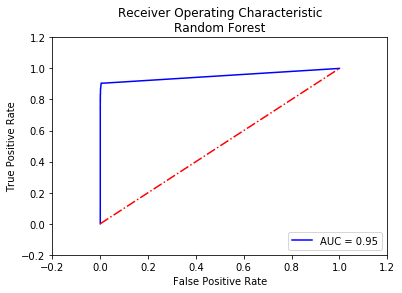

Accuracy: 0.9995611032109689
Total test data points: 56961
TP  75
FP  5
TN  56861
FN  20
BCR : BALANCED CLASSIFICATION RATE  0.8946928791045246
total fraud  95
total legit  56866
Recall; percentage of detected fraud  0.7894736842105263
false alarm rate  8.792600147715683e-05


In [20]:
y_rf=rf.predict(Xv)
y_rf_prob=rf.predict_proba(Xv)[:,1]

#Performance metrics evaluation
auc=metrics.roc_auc_score(yv,y_rf_prob)

#plotting the ROC curve
fpr,tpr,thresholds=metrics.roc_curve(yv,y_rf_prob)
plt.plot(fpr,tpr,'b', label='AUC = %0.2f'% auc)
plt.plot([0,1],[0,1],'r-.')
plt.xlim([-0.2,1.2])
plt.ylim([-0.2,1.2])
plt.title('Receiver Operating Characteristic\nRandom Forest')
plt.legend(loc='lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
predictions=y_rf
pred_fraud = np.where(predictions == 1)[0]
real_fraud = np.where(yv == 1)[0]
false_pos = len(np.setdiff1d(pred_fraud, real_fraud))


pred_good = np.where(predictions == 0)[0]
real_good = np.where(yv == 0)[0]
false_neg = len(np.setdiff1d(pred_good, real_good))
FP=false_pos
FN=false_neg
TP=len(real_fraud)-FN
TN=len(real_good)-FP
false_neg_rate = false_neg/(false_pos+false_neg)

accuracy = (len(Xv) - (false_neg + false_pos)) / len(Xv)
print("Accuracy:", accuracy)

print("Total test data points:", len(Xv))


print("TP ",TP)
print("FP ",FP)
print("TN ",TN)
print("FN ",FN)
recall=TP/float(TP+FN)
ee=TP/float(TP+FN)
tmp=TN/float(TN+FP)
MCC=ee+tmp
MCC=MCC/2
print("BCR : BALANCED CLASSIFICATION RATE ",MCC)
print("total fraud ",TP+FN)
print("total legit ",TN+FP)
print("Recall; percentage of detected fraud ",recall)
far=FP/float(TN+FP)
print("false alarm rate ",far)

# Hyper Tuning

## Logistic Reg

Accuracy: 0.9744215441873529
Total test data points: 56962
TP  84
FP  1449
TN  55421
FN  8
BCR : BALANCED CLASSIFICATION RATE  0.9437821576287643
total fraud  92
total legit  56870
Recall; percentage of detected fraud  0.9130434782608695
false alarm rate  0.02547916300334095


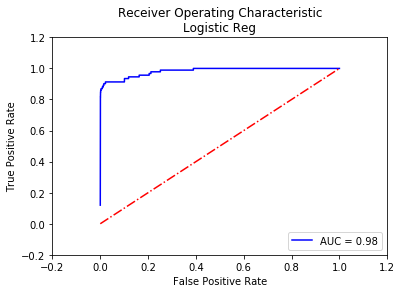

In [15]:
from sklearn.linear_model import LogisticRegression

model=LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight='balanced', random_state=None,max_iter=500, multi_class='ovr', verbose=0, warm_start=False, n_jobs=1)

model.fit(X2,y2)

predictions = model.predict(X)
pred_fraud = np.where(predictions == 1)[0]
real_fraud = np.where(y == 1)[0]
false_pos = len(np.setdiff1d(pred_fraud, real_fraud))


pred_good = np.where(predictions == 0)[0]
real_good = np.where(y == 0)[0]
false_neg = len(np.setdiff1d(pred_good, real_good))
FP=false_pos
FN=false_neg
TP=len(real_fraud)-FN
TN=len(real_good)-FP
false_neg_rate = false_neg/(false_pos+false_neg)

accuracy = (len(X) - (false_neg + false_pos)) / len(X)
print("Accuracy:", accuracy)

print("Total test data points:", len(X))
import math

print("TP ",TP)
print("FP ",FP)
print("TN ",TN)
print("FN ",FN)
recall=TP/float(TP+FN)
ee=TP/float(TP+FN)
tmp=TN/float(TN+FP)
MCC=ee+tmp
MCC=MCC/2
print("BCR : BALANCED CLASSIFICATION RATE ",MCC)
print("total fraud ",TP+FN)
print("total legit ",TN+FP)
print("Recall; percentage of detected fraud ",recall)
far=FP/float(TN+FP)
print("false alarm rate ",far)

y_rf=model.predict(X)
y_rf_prob=model.predict_proba(X)[:,1]

auc=metrics.roc_auc_score(y,y_rf_prob)

#plotting the ROC curve
fpr,tpr,thresholds=metrics.roc_curve(y,y_rf_prob)
plt.plot(fpr,tpr,'b', label='AUC = %0.2f'% auc)
plt.plot([0,1],[0,1],'r-.')
plt.xlim([-0.2,1.2])
plt.ylim([-0.2,1.2])
plt.title('Receiver Operating Characteristic\nLogistic Reg')
plt.legend(loc='lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Detection rate increase to 92% but the catch is the increase of False Alarm rates to 2.5%

Accuracy: 0.9948035532460237
Total test data points: 56962
TP  77
FP  281
TN  56589
FN  15
BCR : BALANCED CLASSIFICATION RATE  0.9160077140083027
total fraud  92
total legit  56870
Recall; percentage of detected fraud  0.8369565217391305
false alarm rate  0.004941093722525057


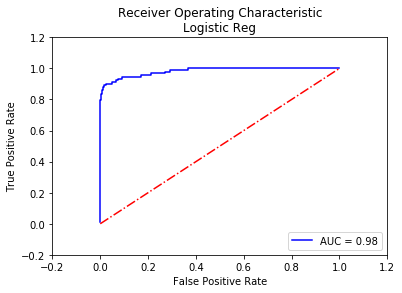

In [52]:
from sklearn.linear_model import LogisticRegression

model=LogisticRegression(penalty='l2', dual=False, tol=0.123, C=1.0, fit_intercept=True, intercept_scaling=100, class_weight='balanced', random_state=None,max_iter=200, multi_class='ovr', verbose=0, warm_start=False, n_jobs=1)

model.fit(X2,y2)

predictions = model.predict(X)
pred_fraud = np.where(predictions == 1)[0]
real_fraud = np.where(y == 1)[0]
false_pos = len(np.setdiff1d(pred_fraud, real_fraud))


pred_good = np.where(predictions == 0)[0]
real_good = np.where(y == 0)[0]
false_neg = len(np.setdiff1d(pred_good, real_good))
FP=false_pos
FN=false_neg
TP=len(real_fraud)-FN
TN=len(real_good)-FP
false_neg_rate = false_neg/(false_pos+false_neg)

accuracy = (len(X) - (false_neg + false_pos)) / len(X)
print("Accuracy:", accuracy)

print("Total test data points:", len(X))
import math

print("TP ",TP)
print("FP ",FP)
print("TN ",TN)
print("FN ",FN)
recall=TP/float(TP+FN)
ee=TP/float(TP+FN)
tmp=TN/float(TN+FP)
MCC=ee+tmp
MCC=MCC/2
print("BCR : BALANCED CLASSIFICATION RATE ",MCC)
print("total fraud ",TP+FN)
print("total legit ",TN+FP)
print("Recall; percentage of detected fraud ",recall)
far=FP/float(TN+FP)
print("false alarm rate ",far)

y_rf=model.predict(X)
y_rf_prob=model.predict_proba(X)[:,1]

auc=metrics.roc_auc_score(y,y_rf_prob)

#plotting the ROC curve
fpr,tpr,thresholds=metrics.roc_curve(y,y_rf_prob)
plt.plot(fpr,tpr,'b', label='AUC = %0.2f'% auc)
plt.plot([0,1],[0,1],'r-.')
plt.xlim([-0.2,1.2])
plt.ylim([-0.2,1.2])
plt.title('Receiver Operating Characteristic\nLogistic Reg')
plt.legend(loc='lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Accuracy: 0.9955759203665666
Total test data points: 56961
TP  91
FP  232
TN  56618
FN  20
BCR : BALANCED CLASSIFICATION RATE  0.9078694525660225
total fraud  111
total legit  56850
Recall; percentage of detected fraud  0.8198198198198198
false alarm rate  0.004080914687774846


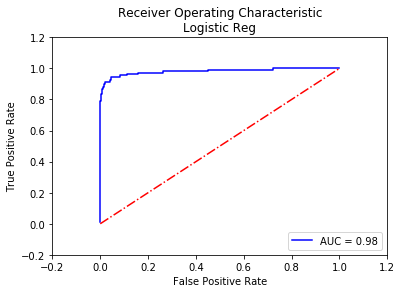

In [53]:
predictions = model.predict(Xv)
pred_fraud = np.where(predictions == 1)[0]
real_fraud = np.where(yv == 1)[0]
false_pos = len(np.setdiff1d(pred_fraud, real_fraud))


pred_good = np.where(predictions == 0)[0]
real_good = np.where(yv == 0)[0]
false_neg = len(np.setdiff1d(pred_good, real_good))
FP=false_pos
FN=false_neg
TP=len(real_fraud)-FN
TN=len(real_good)-FP
false_neg_rate = false_neg/(false_pos+false_neg)

accuracy = (len(Xv) - (false_neg + false_pos)) / len(Xv)
print("Accuracy:", accuracy)

print("Total test data points:", len(Xv))
import math

print("TP ",TP)
print("FP ",FP)
print("TN ",TN)
print("FN ",FN)
recall=TP/float(TP+FN)
ee=TP/float(TP+FN)
tmp=TN/float(TN+FP)
MCC=ee+tmp
MCC=MCC/2
print("BCR : BALANCED CLASSIFICATION RATE ",MCC)
print("total fraud ",TP+FN)
print("total legit ",TN+FP)
print("Recall; percentage of detected fraud ",recall)
far=FP/float(TN+FP)
print("false alarm rate ",far)

y_rf=model.predict(Xv)
y_rf_prob=model.predict_proba(Xv)[:,1]

auc=metrics.roc_auc_score(yv,y_rf_prob)

#plotting the ROC curve
fpr,tpr,thresholds=metrics.roc_curve(yv,y_rf_prob)
plt.plot(fpr,tpr,'b', label='AUC = %0.2f'% auc)
plt.plot([0,1],[0,1],'r-.')
plt.xlim([-0.2,1.2])
plt.ylim([-0.2,1.2])
plt.title('Receiver Operating Characteristic\nLogistic Reg')
plt.legend(loc='lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Alors en utilisant par exemple ce modele pour la detection de fraude en réalité
En utitilisant la theoreme de Bayes on peut calculer la probablite qu'une transaction
est fraude;


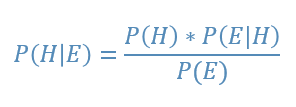

In [58]:
print("Alors en utilisant par exemple ce modele pour la detection de fraude en réalité")
print("En utitilisant la theoreme de Bayes on peut calculer la probablite qu'une transaction")
print("est fraude;")
from IPython.display import Image
Image(filename='C:/Users/VonGola/Desktop/b.png')


**Dans ce cas; E=Event=Detection , H=Hypothesis=Fraude** <br>
**la probablite qu'une transaction est fraude en cas de detection (F|D)=28.76%** <br>
**la probablite qu'une transaction est valide en cas de detection p(~F|D)=71.14%**

## Pour le cas du modele optimal : RandomForest
            (en utilisant les resultats du deuxieme test)
**la probablite qu'une transaction est fraude en cas de detection (F|D)=94.73%** <br>
**la probablite qu'une transaction est valide en cas de detection p(~F|D)=5.27%**<br>
**la probablite qu'une transaction est fraude passe (remains undetected) p(F|~D)=0.2%**



In [60]:
## A.BELFKIH@HPS